# Outline:
I. Data exploration

a) Gather Sense of our data


II. Data Preprocessing

a) Scaling and Distributing

b) Splitting the Data


III. Random UnderSampling and Oversampling

a) Distributing and Correlating

b) Classifiers

c) Random under sampling

d) Oversampling with SMOTE


IV. Testing

a) Testing with Logistic Regression, SVM, Decision Tree, Random Forest, K nearest
    neighbours

b) Neural Networks Testing (Undersampling vs Oversampling)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
train= pd.read_csv('/Users/meenajoshi/Desktop/creditcard.csv')
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
train['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
fraudPct, nonFraudPct= train['Class'].value_counts()[0]/len(train)*100, train['Class'].value_counts()[1]/len(train)*100
print(fraudPct, nonFraudPct)

99.82725143693798 0.1727485630620034


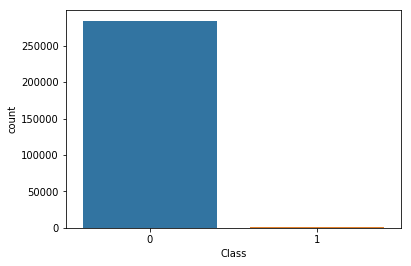

In [6]:
sns.countplot(train.Class)

# Understanding Data:

The transaction amount is relatively small. The mean of all the amounts made is approximately USD 88.
There are no "Null" values.
The dataset is highly imbalanced, the positive class (frauds) account for 0.172% of all transactions.

All V features V1, V2, ... V28 are the principal components obtained with PCA, we dont know what these columns are (due to privacy reasons).The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


/Users/meenajoshi/Anaconda/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


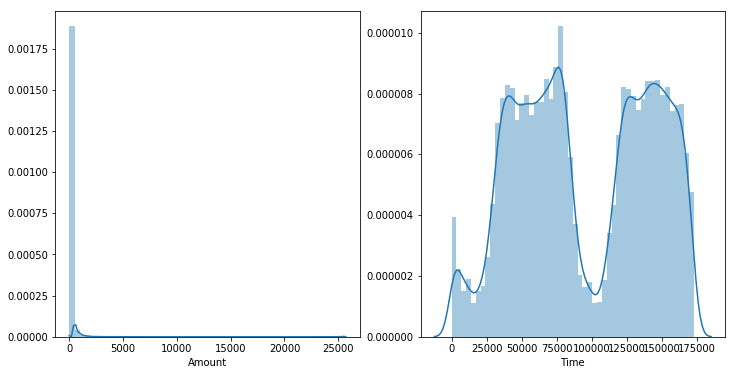

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train.Amount)
plt.subplot(1,2,2)
sns.distplot(train.Time)
plt.show()

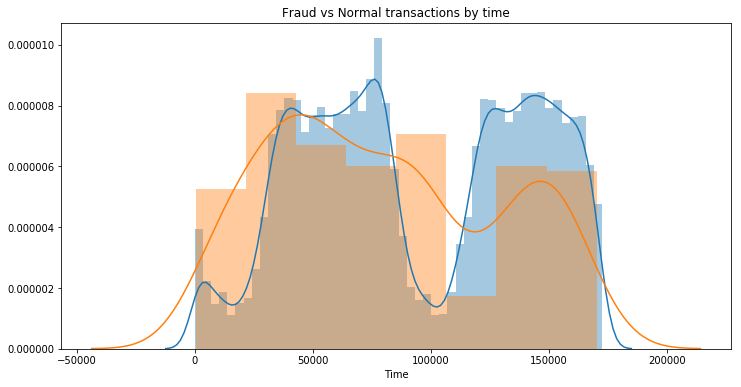

In [8]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['Class']==0]['Time'])
sns.distplot(train[train['Class']==1]['Time'])
plt.title('Fraud vs Normal transactions by time')
plt.show()

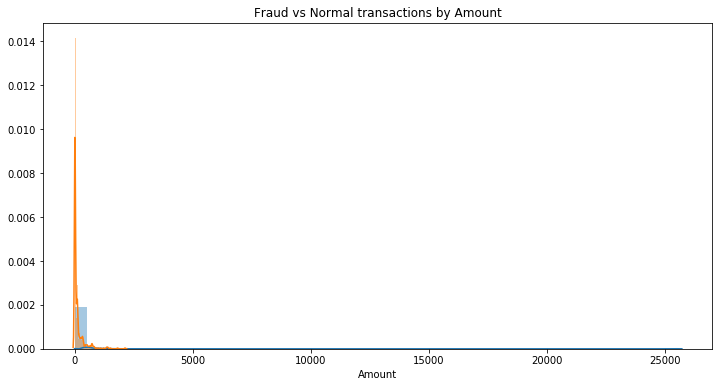

In [9]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['Class']==0]['Amount'])
sns.distplot(train[train['Class']==1]['Amount'])
plt.title('Fraud vs Normal transactions by Amount')
plt.show()

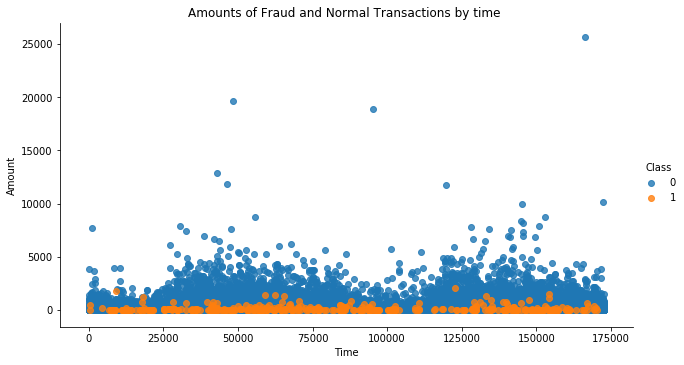

In [11]:
sns.lmplot(y="Amount", x="Time", fit_reg=False,aspect=1.8,
                data=train, hue='Class')
plt.title("Amounts of Fraud and Normal Transactions by time ")
plt.show()

In [12]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

a) Scaling and Distributing 

As we can the see from the above distributions how skewed these features are. Time and amount features needs to be scaled as the other columns.


The distribution of target(Class) is highly imbalanced, so we need to create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.
Using the original imbalanced dataframe will cause overfitting(As 99.83%of the observations are non fraud). By having an imbalance dataframe we are not able to see the true correlations between the class and features.

In [13]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()# RobustScaler is less prone to outliers.
train['scaled_amount'] = scaler.fit_transform(train['Amount'].values.reshape(-1,1)) 
train['scaled_time'] = scaler.fit_transform(train['Time'].values.reshape(-1,1))
train.drop(['Time','Amount'], axis=1, inplace=True)
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


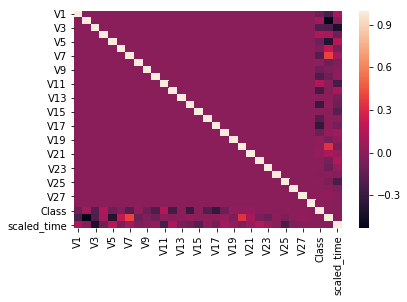

In [14]:
sns.heatmap(train.corr())

b) Splitting the data

We will compare the performance of different models on original data first. 

Lets split our original imbalanced dataset into train and test subset, then evaluate the performance of different models on it.

In [15]:
X = train.drop('Class', axis=1)
y = train['Class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)
len(X_train),len(X_test),len(y_train),len(y_test)

(227845, 56962, 227845, 56962)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RFC": RandomForestClassifier()
}

In [18]:
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report, precision_score,recall_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    pred= classifier.predict(X_test)
    print('\n Classifier:{}'.format(key))
    print('\n ROC_AUC')
    print(roc_auc_score(y_test, pred))
    print('\n ConfusionMatrix')
    print(confusion_matrix(y_test, pred))
    print('\n ClassificationReport')
    print(classification_report(y_test, pred))
    print('\n Precision_score')
    print(precision_score(y_test, pred))
    print('\n Recall_score')
    print(recall_score(y_test, pred))


 Classifier:LogisiticRegression

 ROC_AUC
0.8167525428084921

 ConfusionMatrix
[[56852     9]
 [   37    64]]

 ClassificationReport
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56861
          1       0.88      0.63      0.74       101

avg / total       1.00      1.00      1.00     56962


 Precision_score
0.8767123287671232

 Recall_score
0.6336633663366337

 Classifier:KNearest

 ROC_AUC
0.9009373387700178

 ConfusionMatrix
[[56855     6]
 [   20    81]]

 ClassificationReport
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56861
          1       0.93      0.80      0.86       101

avg / total       1.00      1.00      1.00     56962


 Precision_score
0.9310344827586207

 Recall_score
0.801980198019802

 Classifier:Support Vector Classifier

 ROC_AUC
0.8266887064007574

 ConfusionMatrix
[[56856     5]
 [   35    66]]

 ClassificationReport
             precision    recall



Classifiers on original imbalanced dataset have unsatisfactory results, lots of misclassification. We dont want to miss a fraud transaction!!

Even though recall is a goal metric here, we also want to keep the model accurate as a 
whole. Lets try sampling approaches:

# Random Under-Sampling:

As our dataset is highly imbalanced, we will use random undersampling to avoid overfitting.
Here we will remove data of majority class(0) to have a more balanced dataset. There is a risk of information loss in this technique as we are using just 492 non fraud transactions out of 284315 to make the 50/50 ratio of fraud/non fraud transcations.




We will train our classifiers on undersampled dataset and will be testing our model on the original dataset.
 
Lets test our models on the undersampled data too to see the affect!!

We are using undersampling/oversampling to detect patterns in the dataset which can be used for testing on the original dataset.

In [19]:
fraud= train.loc[train['Class']==1]
nonFraud = train.loc[train['Class']==0][:492]
underSampled= pd.concat([fraud, nonFraud])
underSampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.307413,-0.990214
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,7.084469,-0.989438
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,3.045204,-0.942563
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.517013,-0.912910
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.293440,-0.906648


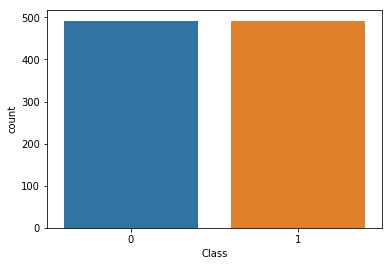

In [20]:
sns.countplot(underSampled.Class)

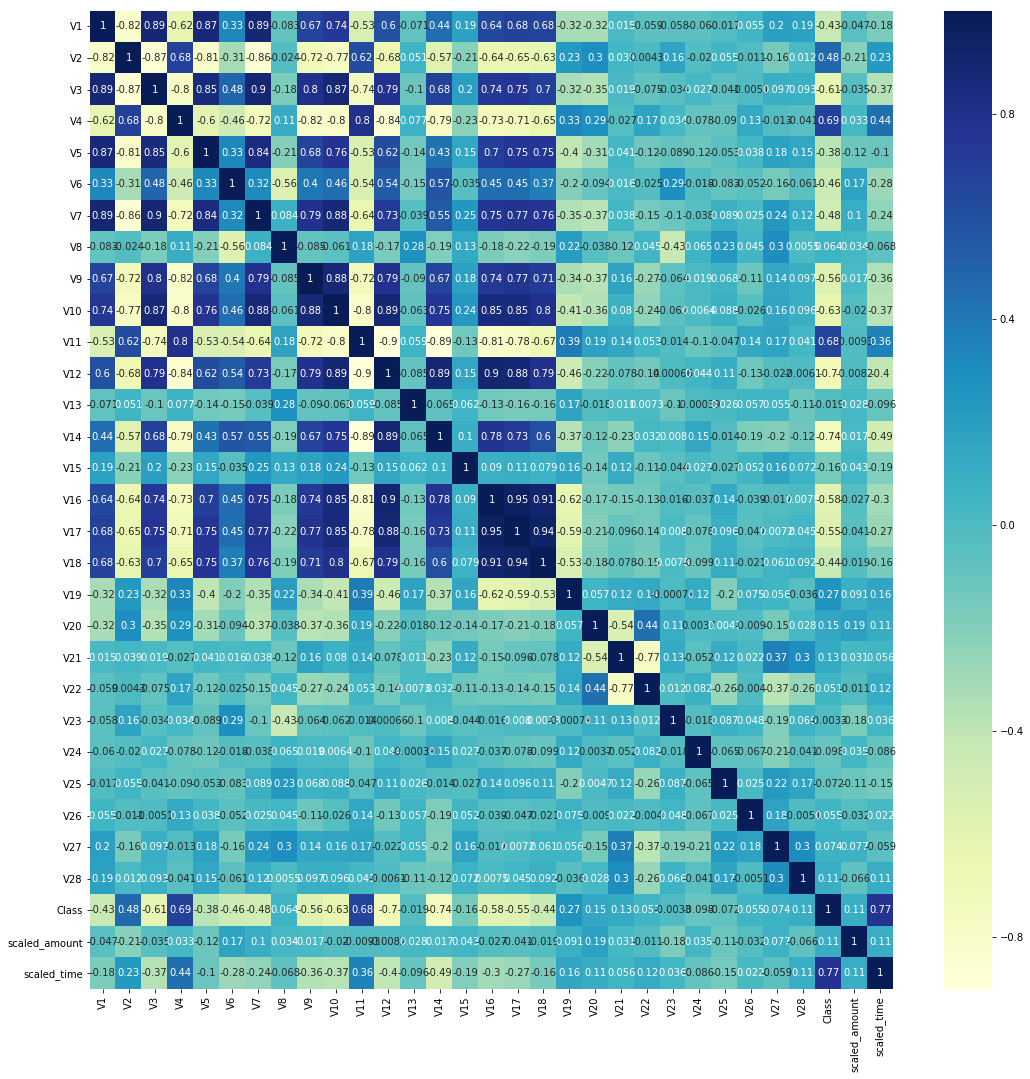

In [21]:
plt.figure(figsize=(18,18))
sns.heatmap(underSampled.corr(), annot= True,cmap="YlGnBu")

In [22]:
underSampled.corr()['Class'].sort_values(ascending= False)

Class            1.000000
scaled_time      0.766175
V4               0.685672
V11              0.675408
V2               0.478113
V19              0.268535
V20              0.151902
V21              0.128754
scaled_amount    0.108269
V28              0.107971
V27              0.074154
V8               0.063857
V26              0.054539
V22              0.051141
V23             -0.003291
V13             -0.018859
V25             -0.072055
V24             -0.098485
V15             -0.155419
V5              -0.378402
V1              -0.426422
V18             -0.435873
V6              -0.457721
V7              -0.484249
V17             -0.554530
V9              -0.564955
V16             -0.579323
V3              -0.613963
V10             -0.631532
V12             -0.701195
V14             -0.739062
Name: Class, dtype: float64

In [23]:
X_Us=underSampled.drop('Class', axis=1)
y_Us=underSampled['Class']

In [24]:
for key, classifier in classifiers.items():
    classifier.fit(X_Us, y_Us)
    predictions= classifier.predict(X_test)
    print('\n Classifier:{}'.format(key))
    print('\n ROC_AUC')
    print(roc_auc_score(y_test, predictions))
    print('\n ConfusionMatrix')
    print(confusion_matrix(y_test, predictions))
    print('\n ClassificationReport')
    print(classification_report(y_test, predictions))
    print('\n Precision_score')
    print(precision_score(y_test, predictions))
    print('\n Recall_score')
    print(recall_score(y_test, predictions))


 Classifier:LogisiticRegression

 ROC_AUC
0.6768523240885669

 ConfusionMatrix
[[20112 36749]
 [    0   101]]

 ClassificationReport
             precision    recall  f1-score   support

          0       1.00      0.35      0.52     56861
          1       0.00      1.00      0.01       101

avg / total       1.00      0.35      0.52     56962


 Precision_score
0.002740841248303935

 Recall_score
1.0

 Classifier:KNearest

 ROC_AUC
0.9302256275116617

 ConfusionMatrix
[[52304  4557]
 [    6    95]]

 ClassificationReport
             precision    recall  f1-score   support

          0       1.00      0.92      0.96     56861
          1       0.02      0.94      0.04       101

avg / total       1.00      0.92      0.96     56962


 Precision_score
0.020421324161650902

 Recall_score
0.9405940594059405

 Classifier:Support Vector Classifier

 ROC_AUC
0.779128397354605

 ConfusionMatrix
[[32869 23992]
 [    2    99]]

 ClassificationReport
             precision    recall  f1-score 

Result of model trained on undersampled data are good in terms of recall score( predicting fraud correctly). Even Random Forest classifier and Decition Tree are performing 100% correct classification for frauds. We can tune the better performing classifiers, by setting thresholds and use other trial based approaches to improve the overall performance of the classifiers. Lets try neaural network!!

# Neural Network- Test Undersampled dataset

Here we will implement a simple Neural Network with one hidden layer for detecting fraud transactions. We want to see the behaviour of Neural Network in undersampled dataset and accuracy in classifying both fraud and non fraud transactions.
Although correctly predicting frauds is the goal but but we should also emphasize correctly categorizing non-fraud transactions.

We will fit this model in the random undersampled subset in order to predict the final result using the original dataframe testing data.

Its a simple model composed of one input layer (where the number of nodes equals the number of features) plus bias node, one hidden layer with 32 nodes and one output node composed of two possible results 0 or 1 (No fraud or fraud).
Other characteristics: The learning rate will be 0.001, the optimizer we will use is the AdamOptimizer, the activation function that is used in this scenario is "Relu" and for the final outputs we will use sparse categorical cross entropy, which gives the probability whether an instance case is no fraud or fraud (The prediction will pick the highest probability between the two.)

In [25]:
import keras
#from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dense
#from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_Us.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

Using TensorFlow backend.


In [26]:
undersample_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [27]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
undersample_model.fit(X_Us, y_Us, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 787 samples, validate on 197 samples
Epoch 1/20
 - 0s - loss: 0.7769 - acc: 0.6455 - val_loss: 0.6105 - val_acc: 0.6954
Epoch 2/20
 - 0s - loss: 0.2846 - acc: 0.9085 - val_loss: 0.3698 - val_acc: 0.9340
Epoch 3/20
 - 0s - loss: 0.2031 - acc: 0.9454 - val_loss: 0.2597 - val_acc: 0.9543
Epoch 4/20
 - 0s - loss: 0.1503 - acc: 0.9581 - val_loss: 0.2058 - val_acc: 0.9492
Epoch 5/20
 - 0s - loss: 0.1190 - acc: 0.9606 - val_loss: 0.1679 - val_acc: 0.9543
Epoch 6/20
 - 0s - loss: 0.0984 - acc: 0.9657 - val_loss: 0.1523 - val_acc: 0.9543
Epoch 7/20
 - 0s - loss: 0.0832 - acc: 0.9695 - val_loss: 0.1408 - val_acc: 0.9543
Epoch 8/20
 - 0s - loss: 0.0740 - acc: 0.9746 - val_loss: 0.1552 - val_acc: 0.9492
Epoch 9/20
 - 0s - loss: 0.0660 - acc: 0.9784 - val_loss: 0.1517 - val_acc: 0.9492
Epoch 10/20
 - 0s - loss: 0.0588 - acc: 0.9797 - val_loss: 0.1597 - val_acc: 0.9442
Epoch 11/20
 - 0s - loss: 0.0539 - acc: 0.9835 - val_loss: 0.1617 - val_acc: 0.9442
Epoch 12/20
 - 0s - loss: 0.0501 - acc:

In [29]:
undersample_predictions = undersample_model.predict(X_test, batch_size=200, verbose=0)


In [30]:
undersample_fraud_predictions = undersample_model.predict_classes(X_test, batch_size=200, verbose=0)

In [31]:
confusion_matrix(y_test, undersample_fraud_predictions)

array([[28460, 28401],
       [    0,   101]])

In [32]:
print(classification_report(y_test, undersample_fraud_predictions))
print('\n Precision_score')
print(precision_score(y_test, undersample_fraud_predictions))
print('\n Recall_score')
print(recall_score(y_test, undersample_fraud_predictions))

             precision    recall  f1-score   support

          0       1.00      0.50      0.67     56861
          1       0.00      1.00      0.01       101

avg / total       1.00      0.50      0.67     56962


 Precision_score
0.0035436109746684445

 Recall_score
1.0


In [33]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[28460 28401]
 [    0   101]]
Confusion matrix, without normalization
[[56861     0]
 [    0   101]]


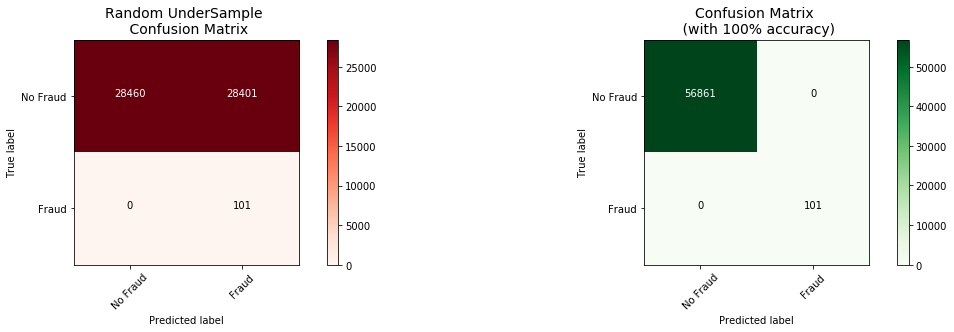

In [34]:
undersample_cm = confusion_matrix(y_test, undersample_fraud_predictions)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)


# Over Sampling

SMOTE stands for Synthetic Minority Over-sampling Technique. SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". 

The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors. Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen. More information is retained as we are not deleting any row,its likely rhat SMOTE will perform better than random under sampling. However it will take more time to train. 

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))


Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962


In [36]:
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_sample(X_train, y_train)
print('Length of X (oversampled): {} | Length of y (oversampled): {}'.format(len(X_sm), len(y_sm)))

Length of X (oversampled): 454908 | Length of y (oversampled): 454908


In [37]:
n_inputs = X_sm.shape[1]

smote_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [38]:
smote_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [39]:
smote_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [40]:
smote_model.fit(X_sm, y_sm, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 363926 samples, validate on 90982 samples
Epoch 1/20
 - 2s - loss: 0.0885 - acc: 0.9654 - val_loss: 0.0396 - val_acc: 0.9883
Epoch 2/20
 - 2s - loss: 0.0163 - acc: 0.9962 - val_loss: 0.0108 - val_acc: 0.9995
Epoch 3/20
 - 2s - loss: 0.0097 - acc: 0.9979 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 4/20
 - 2s - loss: 0.0074 - acc: 0.9984 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 5/20
 - 2s - loss: 0.0059 - acc: 0.9988 - val_loss: 0.0089 - val_acc: 0.9997
Epoch 6/20
 - 2s - loss: 0.0053 - acc: 0.9990 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 7/20
 - 2s - loss: 0.0043 - acc: 0.9993 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 8/20
 - 2s - loss: 0.0041 - acc: 0.9993 - val_loss: 6.2640e-04 - val_acc: 1.0000
Epoch 9/20
 - 2s - loss: 0.0032 - acc: 0.9994 - val_loss: 0.0039 - val_acc: 0.9998
Epoch 10/20
 - 2s - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 11/20
 - 2s - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 12/20
 - 2s - loss: 0.00

In [41]:
smote_predictions = smote_model.predict(X_test, batch_size=200, verbose=0)


In [42]:
smote_fraud_predictions = smote_model.predict_classes(X_test, batch_size=200, verbose=0)

In [43]:
confusion_matrix(y_test, smote_fraud_predictions)

array([[56823,    38],
       [   18,    83]])

Confusion matrix, without normalization
[[56823    38]
 [   18    83]]
Confusion matrix, without normalization
[[56861     0]
 [    0   101]]


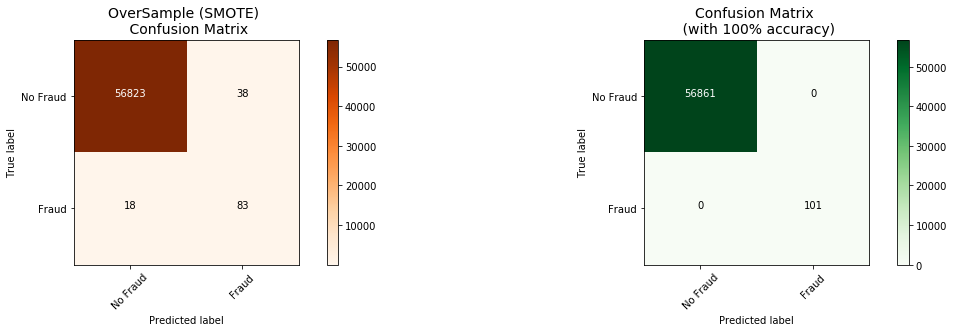

In [44]:
oversample_smote = confusion_matrix(y_test, smote_fraud_predictions)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)


In [45]:
print(classification_report(y_test, smote_fraud_predictions))
print('\n Precision_score')
print(precision_score(y_test, smote_fraud_predictions))
print('\n Recall_score')
print(recall_score(y_test, smote_fraud_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56861
          1       0.69      0.82      0.75       101

avg / total       1.00      1.00      1.00     56962


 Precision_score
0.6859504132231405

 Recall_score
0.8217821782178217


# Results 

Oversampled data here is performimg better than the undersampled. In undersample data, our model is unable to detect many non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases. This will be a huge disadvantage for the financial institution. The number of customer complaints and customer disatisfaction will increase. Doing outlier removal on both undersampled and oversampled dataset will improve the performance. 
